In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()

## Training dataset preparation

In [4]:
!cat /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml

train: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/train
val: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/val
test: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/test

nc: 2

names: ['s_svd', 's_soc']

In [34]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml'

## Model training: base model

In [5]:
model_name = 'b16_e150_f12'

In [6]:
'''!python train.py --batch 16 \
--epochs 150 \
--data {data_path} \
--weights yolov5s6.pt \
--cache \
--freeze 12 \
--project Norway \
--name {model_name}'''

train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b16_e150_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (174/174), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 185 (delta 82), reused 113 (delta 61), pack-reused 11
Receiving objects: 100% (185/185), 255.09 KiB | 8.23 MiB/s, done.
Resolving deltas: 100% (84/84), completed wi

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/labels/train.cache
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 299.09
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: New cache created: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/labels/val.cache
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 107.89it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b16_e150_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to N

     46/149      1.76G    0.04274    0.01217   0.002496         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.845      0.704      0.785      0.314

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      1.76G    0.03842    0.01033   0.002342         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.727      0.728      0.716      0.446

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      1.76G    0.04157    0.01038   0.003036         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.773      0.744      0.775      0.397

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/14

     71/149      1.76G    0.03056    0.01012   0.001991         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.806      0.855      0.552

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      1.76G    0.03409   0.009988   0.002057         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.796      0.842       0.45

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      1.76G    0.03235    0.01086   0.002703         54        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.793      0.855      0.499

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/14

     96/149      1.76G    0.02661   0.007739   0.001341         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.823      0.853      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      1.76G    0.02547   0.008571   0.001411         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.952      0.829      0.864       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      1.76G    0.02625   0.008767   0.001586         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.965      0.826      0.864      0.623

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/14

    121/149      1.76G    0.02175   0.008082   0.001416         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.954      0.837      0.878      0.637

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      1.76G    0.02196   0.007557   0.001428         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.953      0.838      0.878      0.622

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      1.76G    0.02208   0.009345   0.001032         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.837      0.879      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/14

    146/149      1.76G    0.01747   0.009267   0.001168         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.812      0.862      0.645

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      1.76G    0.01712   0.008767  0.0007008         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.811      0.862      0.647

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      1.76G    0.01697   0.009058  0.0008109         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.963      0.813      0.862      0.651

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/14

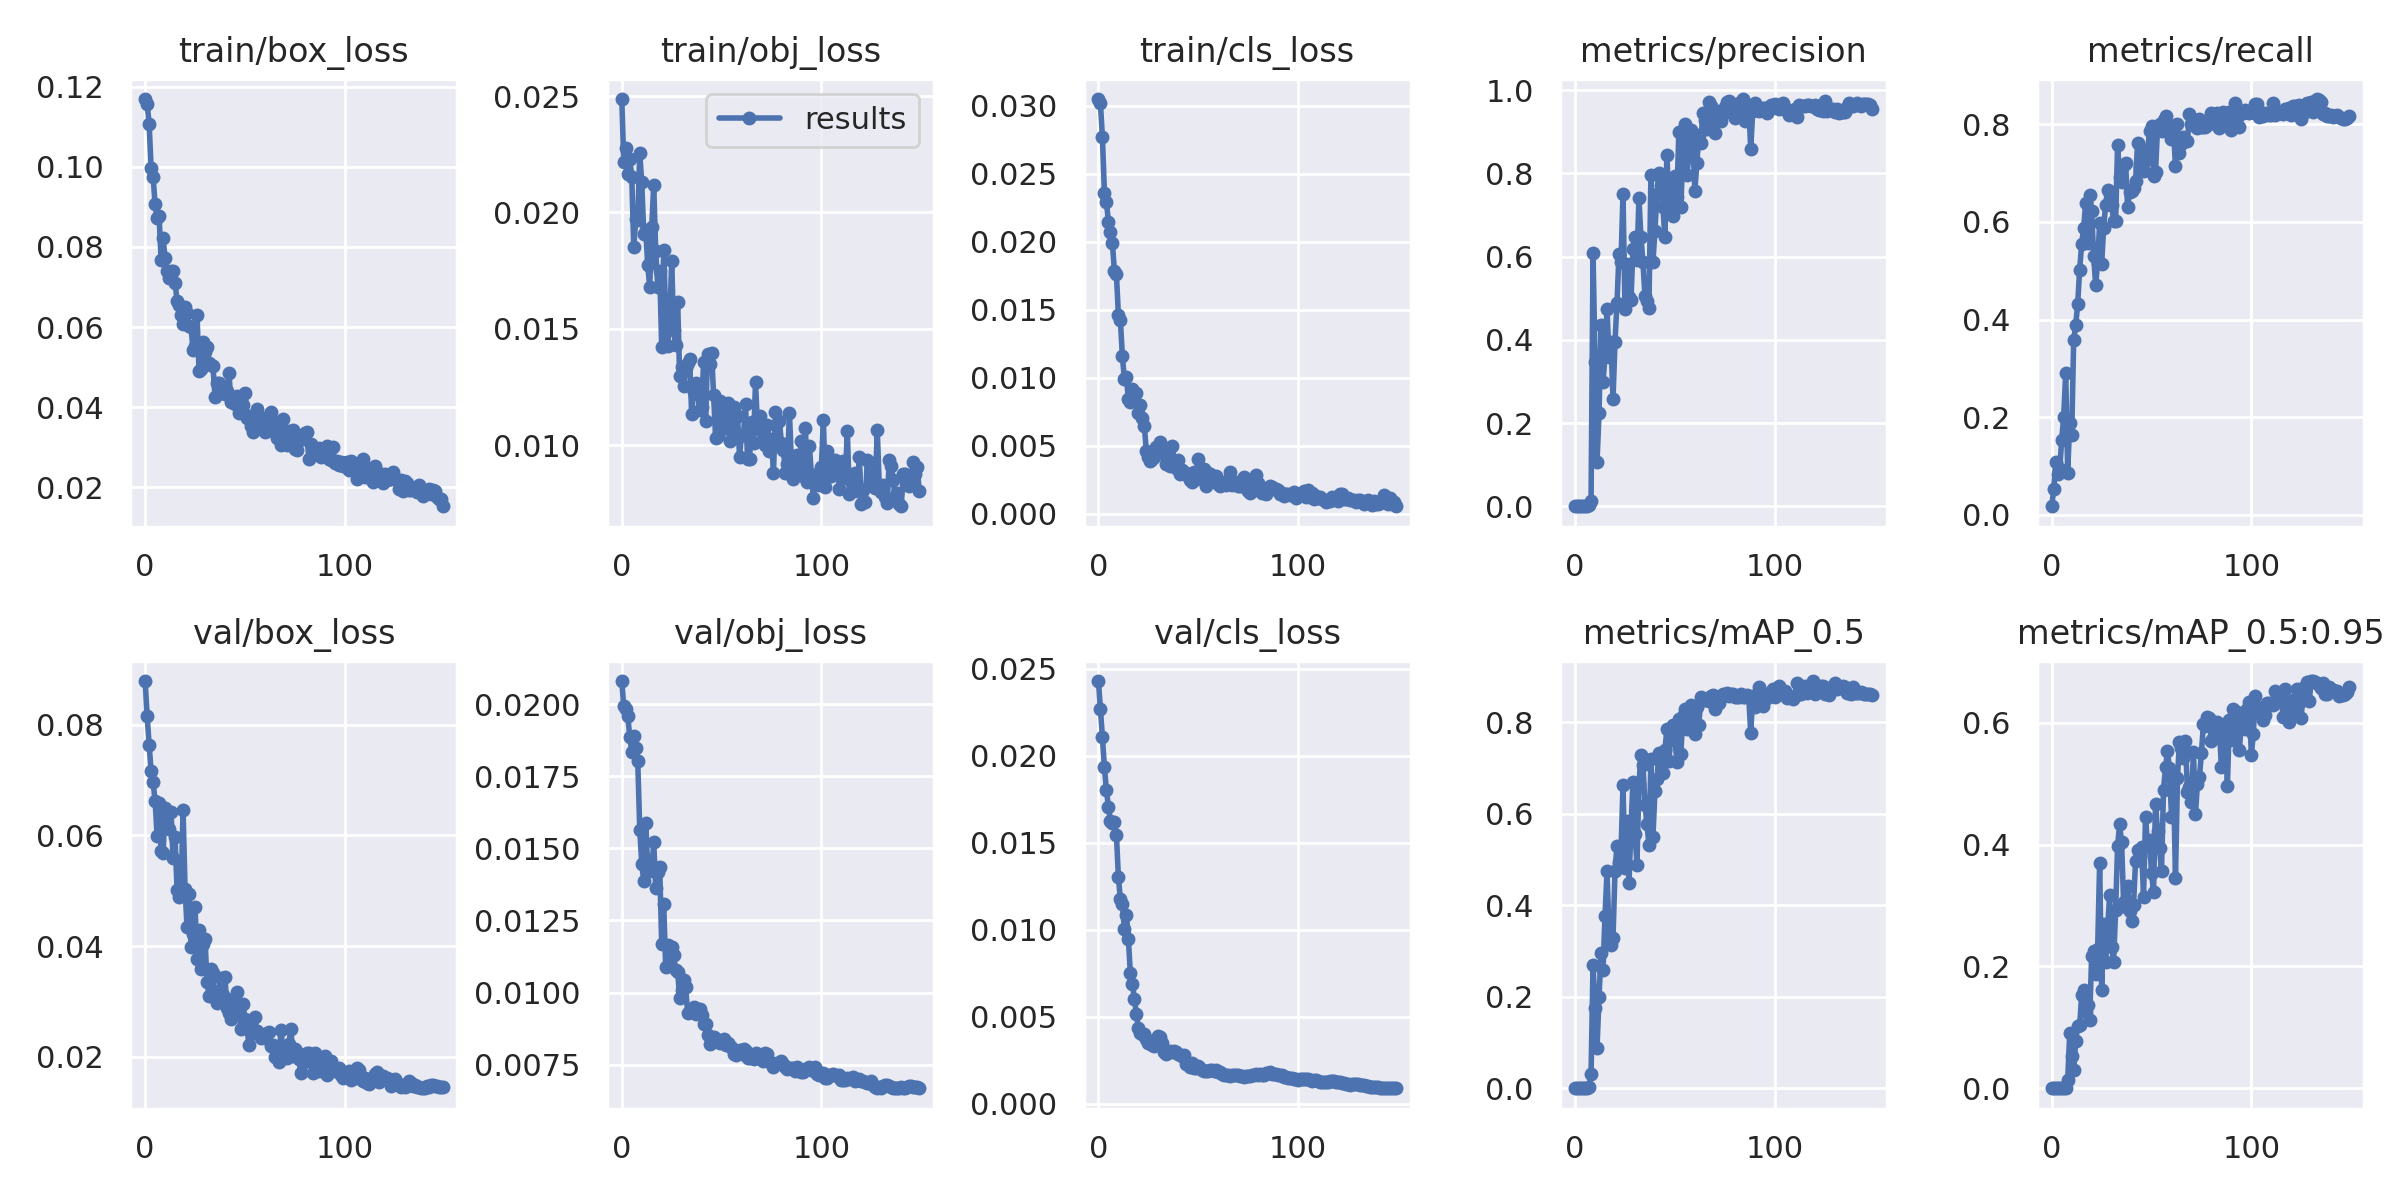

In [7]:
display.Image(f"Norway/b16_e150_f12/results.png")

### Results evaluation

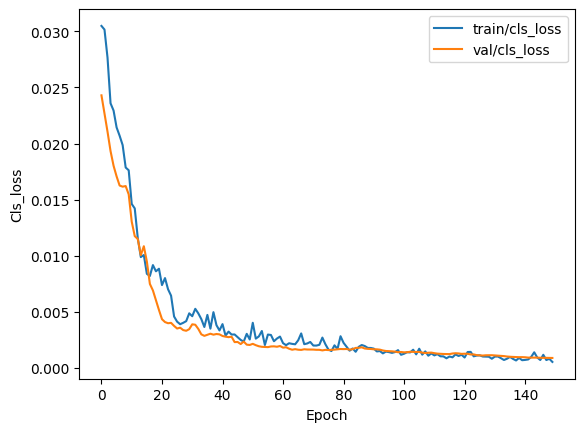

In [8]:
# Put results in a dataframe 
results_csv_path = 'Norway/b16_e150_f12/results.csv'
results = rename_df_cols(pd.read_csv(results_csv_path))

# PLot
plot_losses(results)
plt.show()

### Fine tune: batch size

In [14]:
# Set batch size 

batch_s = [32,64]
'''
for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5s6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}'''

**************TRAINING MODEL b32_e200_f12*********
train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b32_e200_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 27 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentu

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 275.58
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 64.20it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b32_e200_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b32_e200_f12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      1.47G     0.1228    0.02381    0.03198         97        640: 1
                 Class     Images  In

     22/199      2.36G    0.06525     0.0145   0.008308         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.445      0.506      0.435      0.185

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      2.36G    0.07122    0.01751   0.008275        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.313      0.571      0.259      0.101

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      2.36G    0.06855    0.01892   0.007561        111        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.308      0.489      0.284      0.119

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/19

     47/199      2.36G    0.04347    0.01205    0.00403         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.493      0.727      0.633      0.331

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.36G    0.04153    0.01161   0.003054         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.568       0.66      0.586      0.297

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      2.36G    0.04538     0.0107   0.002747         74        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.629      0.763      0.682      0.294

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/19

     72/199      2.36G    0.03319    0.01023   0.002833        142        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.767      0.852      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.36G    0.03604    0.01098   0.002354         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.954      0.771      0.851      0.559

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      2.36G    0.03598    0.01052   0.002178         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.947      0.751      0.832      0.582

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/19

     97/199      2.36G    0.03171   0.009521   0.001778         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.946      0.826      0.881      0.592

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.36G    0.02929   0.008451   0.002163         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.826      0.871      0.613

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      2.36G     0.0276   0.009547   0.001921        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.939      0.819      0.866      0.479

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/19

    122/199      2.36G    0.02371   0.007891   0.001375         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.821      0.882      0.643

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.36G    0.02369   0.007449   0.001413         71        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.833      0.883      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      2.36G    0.02535   0.009119   0.001186         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.833      0.882      0.635

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/19

    147/199      2.36G     0.0215   0.008265   0.001342        110        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.881      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.36G    0.02111   0.007165  0.0009529         63        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.807      0.874      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      2.36G    0.02149   0.008555  0.0009278        114        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.873      0.678

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/19

    172/199      2.36G    0.01749   0.007269  0.0008103         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.871      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.36G    0.01702    0.00824   0.000595         97        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.856      0.652

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      2.36G    0.01785   0.007087  0.0006956         69        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.801      0.857      0.661

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/19

    197/199      2.36G    0.01549   0.007219  0.0004726         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.807      0.885      0.668

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.36G    0.01509   0.007795  0.0004414        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.885      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      2.36G    0.01635   0.007525  0.0005143        116        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.808      0.889      0.669

200 epochs completed in 0.082 hours.
Optimizer stripped from Norway/b32_e200_f12/weights

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.50
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 87.07it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b64_e200_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b64_e200_f12
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      2.31G     0.1221    0.02354    0.03121        224        640: 1
                 Class     Images  In

     22/199      3.07G    0.06895    0.01957    0.01579        183        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.746      0.375       0.45      0.121

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      3.07G    0.07037    0.02238    0.01499        281        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.463      0.422      0.325      0.109

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      3.07G    0.06996    0.02103     0.0147        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.322       0.44      0.223     0.0765

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/19

     47/199      3.07G    0.05701    0.01411   0.005361        185        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.554      0.481      0.493      0.237

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      3.07G    0.05303    0.01441   0.005848        251        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.544      0.562      0.488      0.152

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      3.07G     0.0553    0.01492   0.005427        244        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.522      0.623      0.528      0.192

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/19

     72/199      3.07G    0.03985    0.01329   0.002929        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.634      0.799      0.614      0.277

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      3.07G    0.03981   0.009807   0.003176        157        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.89      0.677      0.796      0.467

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      3.07G    0.04348    0.01081   0.003322        211        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.823      0.737      0.803      0.457

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/19

     97/199      3.07G    0.03179   0.009585    0.00178        299        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.949      0.808      0.846      0.472

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      3.07G    0.03172    0.01027    0.00242        263        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.882      0.817      0.844       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      3.07G    0.03223   0.009996    0.00193        253        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.956      0.811      0.837      0.544

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/19

    122/199      3.07G     0.0271    0.00793   0.001356        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.919      0.823      0.864      0.599

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      3.07G    0.02743    0.01062   0.001553        306        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.943      0.839      0.875      0.536

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      3.07G     0.0277    0.01006   0.001593        298        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.939      0.823      0.853      0.553

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/19

    147/199      3.07G    0.02227   0.007855   0.001282        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.808       0.86       0.62

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      3.07G    0.02209   0.008986   0.001126        289        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.808      0.865      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      3.07G    0.02064   0.008253   0.001128        196        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.814      0.864      0.638

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/19

    172/199      3.07G    0.01916   0.008266  0.0007964        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.955      0.835      0.878      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      3.07G    0.01891   0.007464  0.0009045        218        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.95      0.836      0.879      0.643

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      3.07G    0.01768   0.007487  0.0007075        229        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.944      0.839      0.879      0.625

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/19

    197/199      3.07G    0.01678   0.007248  0.0004442        278        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.825      0.879      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      3.07G    0.01587   0.008243  0.0004999        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.823      0.879      0.658

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      3.07G    0.01558   0.007323  0.0005409        188        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.971      0.821       0.88      0.664

200 epochs completed in 0.067 hours.
Optimizer stripped from Norway/b64_e200_f12/weights

In [16]:
# Read results
results_b32 = rename_df_cols(pd.read_csv(f'Norway/b32_e200_f12/results.csv'))
# PLot
#plot_losses(results_b32)

In [17]:
# Read results
results_b64 = rename_df_cols(pd.read_csv(f'Norway/b64_e200_f12/results.csv'))
# PLot
#plot_losses(results_b64)

### Plot: batch size comparision 

Text(0.5, 1.0, 'base_two_clases_b64_e150_f12')

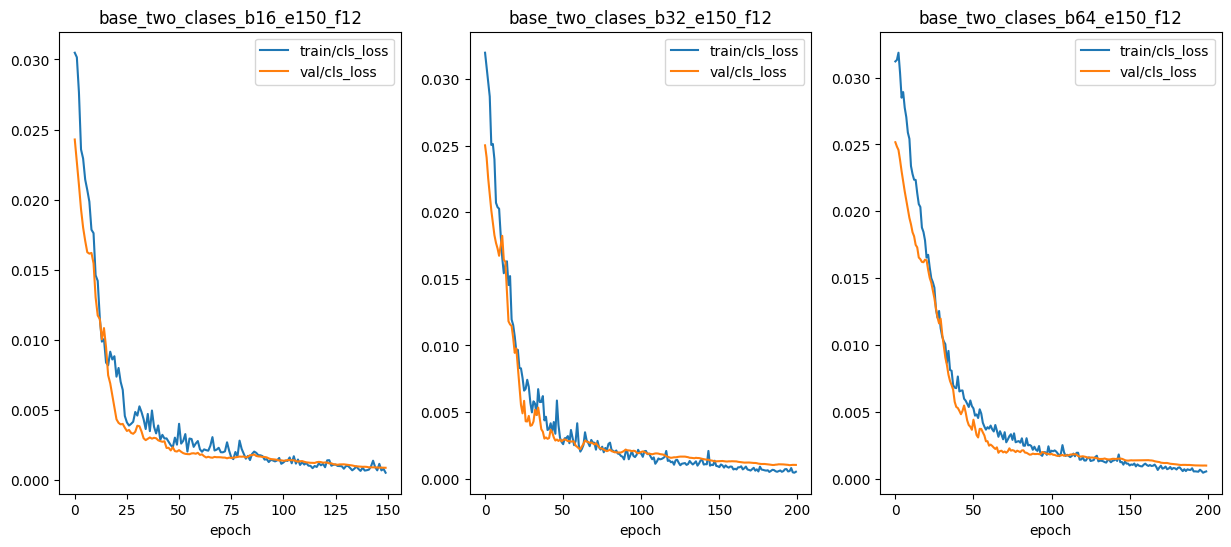

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('base_two_clases_b64_e150_f12')

# Set common labels
#fig.supxlabel('fig.supxlabel')
#fig.supylabel('fig.supylabel')

In [19]:
results.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       '/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')

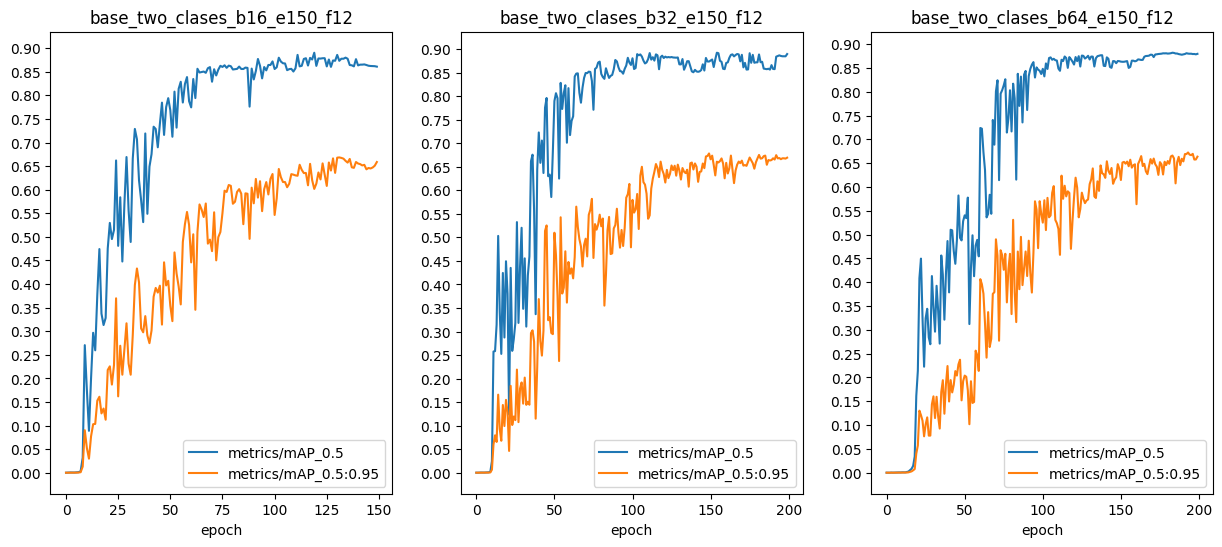

In [25]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('base_two_clases_b64_e150_f12')

axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.05))
axes[2].yaxis.set_major_locator(ticker.MultipleLocator(0.05))


# Set common labels
#fig.supxlabel('fig.supxlabel')
#fig.supylabel('fig.supylabel')

In [32]:
print(results['metrics/mAP_0.5'].max())
print(results['metrics/mAP_0.5:0.95'].max())

print(results_b32['metrics/mAP_0.5'].max())
print(results_b32['metrics/mAP_0.5:0.95'].max())

print(results_b64['metrics/mAP_0.5'].max())
print(results_b64['metrics/mAP_0.5:0.95'].max())

0.89037
0.66842
0.89222
0.67823
0.8819
0.67245


#### Okay, the best model is with batch 32

## Medium model 

In [35]:
# Set batch size 

batch_s = [16,32,64]
'''
for batch in batch_s:
    # Give a name to the model
    model_name = f'b{batch}_e200_f12_v5m6'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Train
    !python train.py --batch {batch} \
    --epochs 200 \
    --data {data_path} \
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}'''

**************TRAINING MODEL b16_e200_f12_v5m6*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=b16_e200_f12_v5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 3 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), 16.49 KiB | 1.27 MiB/s, don

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.31
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 112.75it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b16_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b16_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      1.44G     0.1135    0.02603    0.02819         32        640: 1
                 Class     

     46/199      2.78G    0.03725     0.0102   0.002885         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.731      0.821      0.785      0.428

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      2.78G     0.0336     0.0087   0.003449         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.636      0.813      0.683      0.341

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      2.78G    0.03962   0.008659    0.00338         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.773      0.841      0.778      0.423

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      2.78G    0.02935   0.008207   0.001919         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.798      0.882      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      2.78G    0.03112   0.008306   0.002351         35        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.795      0.888      0.544

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      2.78G    0.03156   0.008987   0.002568         54        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.874      0.835      0.879      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      2.78G    0.02515   0.006496   0.001301         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.861      0.891      0.633

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      2.78G    0.02344   0.006918   0.001449         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.941      0.847      0.891       0.64

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      2.78G    0.02443   0.007206   0.001634         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.957      0.854      0.898      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      2.78G    0.02072   0.006503   0.001446         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.988      0.832      0.901      0.654

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      2.78G    0.02239   0.006187   0.001308         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.832      0.894      0.607

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      2.78G    0.02129   0.007625    0.00121         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986       0.83      0.888      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      2.78G    0.01831   0.007352   0.001122         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962      0.849      0.889      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      2.78G    0.01801   0.006906  0.0009593         38        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.952       0.85       0.89      0.683

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      2.78G    0.01709   0.006766  0.0009095         52        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.844      0.891      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      2.78G    0.01398   0.005566  0.0005951         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.964      0.837      0.899      0.705

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      2.78G    0.01431   0.006043  0.0005686         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.978      0.826      0.895       0.69

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      2.78G     0.0138   0.005757  0.0006704         10        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.838      0.895      0.672

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      2.78G     0.0116   0.006417  0.0005826         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.816      0.894      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      2.78G    0.01266   0.005599  0.0005441         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.825      0.894      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      2.78G    0.01191   0.005794  0.0005388         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.98      0.826      0.893      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 289.02
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 62.61it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b32_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b32_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1192    0.02511     0.0291         97        640: 1
                 Class     

     46/199      4.15G     0.0418    0.01023   0.003868         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.656      0.704      0.738      0.346

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04114    0.01028    0.00349         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.618      0.744       0.71      0.422

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.04083    0.01006   0.003301         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.741      0.804      0.811       0.47

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.03291   0.008427   0.001911         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.989      0.842      0.906      0.575

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.03003   0.008705   0.002306        142        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.842      0.904      0.581

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.03135   0.009236   0.002157         56        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.796      0.844      0.808      0.559

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.02752   0.007001   0.001661        139        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.876        0.9      0.612

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.02836   0.007682   0.001628         83        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912      0.886      0.903      0.614

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.02515   0.006844    0.00187         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.921      0.882        0.9      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.02277   0.006693   0.001336        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.859      0.907      0.648

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.02282    0.00663    0.00164         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.992      0.823      0.909      0.628

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.02126   0.006211   0.001719         71        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.822      0.909      0.624

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.01759      0.007   0.001094        118        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.893       0.91       0.68

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.01761   0.006491  0.0008863        110        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.93      0.897      0.911      0.679

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.01686   0.005825  0.0008244         63        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.886      0.905      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.01397   0.006167  0.0006606         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.866      0.909      0.688

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.01488    0.00579  0.0007606         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.865      0.911      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.01442   0.006671  0.0005791         97        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.869      0.912      0.704

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.01399   0.005539  0.0005943         79        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.909      0.893       0.91      0.715

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.01148   0.005645  0.0004581         76        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.914      0.893       0.91      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.01127   0.006062  0.0004566        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.891       0.91      0.712

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 292.24
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 111.51it/s

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/b64_e200_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/b64_e200_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199      4.14G     0.1186    0.02457    0.02907        224        640: 1
                 Class     

     46/199      5.68G    0.05887     0.0124   0.005271        197        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.567      0.725      0.576      0.247

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      5.68G    0.05037    0.01304   0.005795        185        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.436      0.717       0.46      0.222

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      5.68G    0.04898    0.01289    0.00612        251        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.486      0.744      0.535      0.219

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      5.68G     0.0354   0.009183   0.002239        175        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.722      0.763      0.737      0.465

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      5.68G    0.03581    0.01163    0.00275        247        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.797      0.787      0.836      0.515

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      5.68G    0.03525   0.008612   0.002602        157        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.866      0.805      0.851      0.528

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      5.68G    0.02951   0.008386   0.002297        290        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.96      0.872      0.899      0.616

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      5.68G     0.0273    0.00827   0.002233        299        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.859      0.896      0.519

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      5.68G    0.02817   0.008896   0.002339        263        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.973      0.844      0.894      0.617

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      5.68G    0.02248   0.006846   0.001449        256        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.966      0.831      0.897      0.671

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      5.68G    0.02391   0.006609   0.001508        235        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.977      0.832      0.898      0.681

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      5.68G    0.02274   0.008733   0.001663        306        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.912       0.88      0.899      0.655

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      5.68G    0.01882   0.006368   0.001121        178        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.934      0.858      0.893       0.67

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      5.68G    0.02002   0.006498   0.001548        222        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.684

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      5.68G    0.01956   0.007078  0.0009958        289        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.986      0.819      0.894      0.696

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      5.68G    0.01533   0.005958  0.0007291        201        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.985      0.834      0.898      0.708

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      5.68G    0.01609    0.00679  0.0008153        234        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      5.68G    0.01438   0.005904   0.000828        218        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.825      0.893      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      5.68G    0.01202    0.00547  0.0006405        192        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961       0.84      0.896      0.709

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      5.68G    0.01307    0.00586  0.0005267        278        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.839      0.895      0.702

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      5.68G     0.0125   0.006759  0.0005881        204        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.822      0.895      0.701

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

In [36]:
# Read results
results_b16_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b16_e200_f12_v5m6/results.csv'))
results_b32_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b32_e200_f12_v5m6/results.csv'))
results_b64_v5m6 = rename_df_cols(pd.read_csv(f'Norway/b64_e200_f12_v5m6/results.csv'))

Text(0.5, 1.0, 'b64_e150_f12_v5m6')

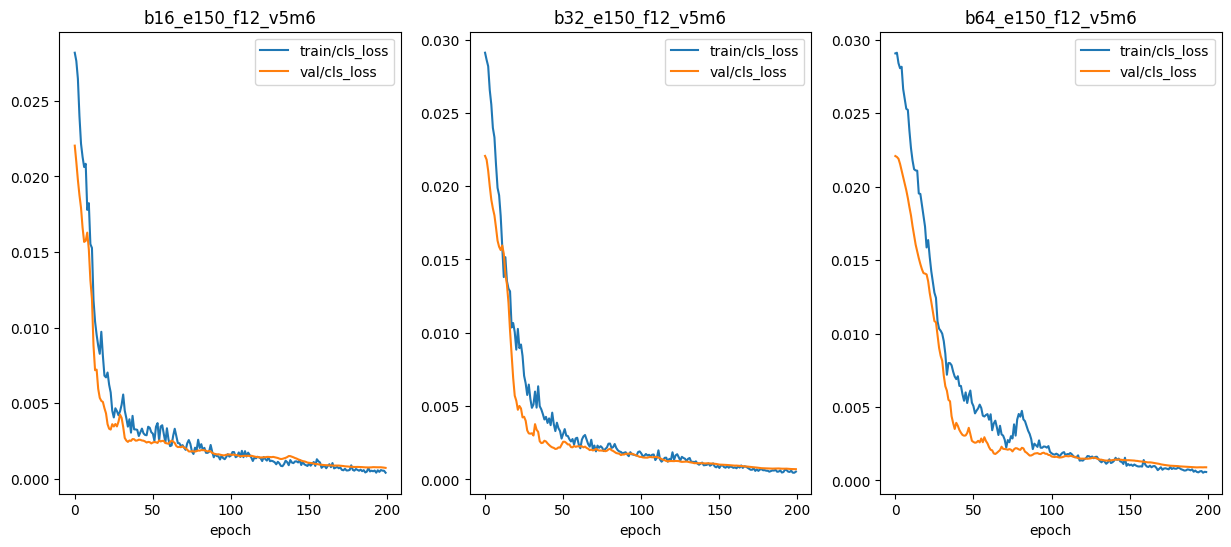

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results_b16_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('b16_e150_f12_v5m6')
axes[1].set_title('b32_e150_f12_v5m6')
axes[2].set_title('b64_e150_f12_v5m6')

In [39]:
print(results_b16_v5m6['metrics/mAP_0.5'].max())
print(results_b16_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b32_v5m6['metrics/mAP_0.5'].max())
print(results_b32_v5m6['metrics/mAP_0.5:0.95'].max())

print(results_b64_v5m6['metrics/mAP_0.5'].max())
print(results_b64_v5m6['metrics/mAP_0.5:0.95'].max())

0.90671
0.71014
0.91678
0.71956
0.90582
0.71818


### The model selected so far is <span style="color:red">b32_e200_f12_v5m6</span>. 

## Fine tune: learning rate 

In [40]:
import yaml

def modify_lr_hyperparam(hyperparam_file_path:str, lr_new:float):
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        #print(yaml_dict['lr0'])
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)

In [43]:
# Set batch size 

batch_s = 32
lr_list = [0.1, 0.001, 0.0001] # 0.01 is already done
hyper_path = 'Norway/hyp.norway_finetune_med.yaml'

for lr in lr_list:
    # Give a name to the model
    model_name = f'lr{lr}_b32_e150_f12_v5m6'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify the hyperparamets file
    modify_lr_hyperparam(hyper_path, lr)
    
    !python train.py --batch {batch_s} \
    --epochs 200 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}

**************TRAINING MODEL lr0.1_b32_e150_f12_v5m6*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=Norway/hyp.norway_finetune_med.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=lr0.1_b32_e150_f12_v5m6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 28 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: 

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 303.58
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 51.98it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/lr0.1_b32_e150_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/lr0.1_b32_e150_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1162    0.01718    0.01751        108        640: 1
               

     22/199      4.15G    0.08819    0.01123    0.01059        141        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.172      0.536      0.148     0.0638

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G    0.09233    0.01067    0.01601         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0333      0.336     0.0248    0.00939

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      4.15G    0.08458    0.01178   0.009121        118        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0138      0.427    0.00879    0.00283

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/19

     47/199      4.15G    0.07252   0.008552   0.006838        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.477      0.691      0.491      0.186

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G     0.0668   0.009893   0.005437         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.384      0.781      0.417       0.21

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/199      4.15G    0.06602   0.008167   0.005082        178        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.548      0.697      0.559      0.217

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/19

     72/199      4.15G    0.05301   0.008401   0.004986        117        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.82      0.757      0.849      0.498

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.04832   0.008718   0.004642         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.903      0.784      0.892      0.449

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/199      4.15G    0.05071   0.006982   0.004981        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.792      0.893      0.554

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/19

     97/199      4.15G    0.05055   0.007006   0.003668         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95        0.9      0.861      0.891      0.522

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.04442   0.007544   0.002692        101        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.941      0.876      0.902      0.568

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/199      4.15G    0.05055   0.007081   0.004342        117        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.901      0.854      0.884      0.504

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/19

    122/199      4.15G      0.045   0.007218   0.002074        130        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.853      0.904      0.618

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.04286   0.006872   0.001847        168        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.916      0.841      0.898      0.594

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/199      4.15G    0.04382   0.007092   0.001854        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.894      0.838      0.898      0.618

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/19

    147/199      4.15G    0.03682   0.006095   0.001406        126        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.942      0.874      0.912      0.663

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G     0.0359   0.006852   0.001712         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.871       0.92      0.653

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/199      4.15G    0.03665   0.007431   0.001784        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.963      0.846      0.925      0.673

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    150/19

    172/199      4.15G    0.03218   0.005845   0.002127         77        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.866      0.924      0.674

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.02859   0.006362   0.001153         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.943      0.867      0.925      0.677

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/199      4.15G    0.03066   0.006138   0.001118         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.973       0.85      0.919      0.667

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    175/19

    197/199      4.15G    0.03269   0.005804   0.001271        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.941      0.876      0.915      0.694

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.02824   0.005631   0.001015         95        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.942      0.875      0.915      0.691

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/199      4.15G    0.03008   0.005577   0.001711        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.942      0.875      0.916      0.695

200 epochs completed in 0.132 hours.
Optimizer stripped from Norway/lr0.1_b32_e150_f12_v

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 301.42
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 69.56it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/lr0.001_b32_e150_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/lr0.001_b32_e150_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1182    0.01714    0.01759        108        640: 1
           

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000209     0.0248   0.000112   2.19e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      4.15G    0.07942    0.01898    0.01475        141        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000317     0.0324   0.000168   3.32e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G    0.07435    0.01805    0.01519         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000309     0.0421   0.000172   4.54e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      4.15G    0.06926    0.01961    0.01441        118        640: 1
          

     46/199      4.15G    0.04593    0.01508    0.01183        138        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.229      0.347      0.183      0.068

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04613    0.01583    0.01315        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.277      0.344      0.224     0.0905

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.04703    0.01692    0.01216         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.324      0.406      0.236      0.107

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.03738    0.01221     0.0113        127        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.54      0.588       0.58      0.366

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.03775    0.01279    0.01104        117        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.527      0.585      0.573      0.366

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.03486    0.01319     0.0105         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.52      0.603       0.57       0.36

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.03356    0.01192   0.008619        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.726      0.694      0.746      0.498

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.03467    0.01085   0.007891         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.721      0.687      0.735      0.476

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.03283    0.01118   0.007498        101        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.776      0.691       0.75      0.479

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.03084    0.01103   0.006014        145        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.829       0.74      0.792      0.512

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.03149    0.01046   0.006576        130        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.868      0.759      0.808      0.537

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.03001    0.01028   0.006048        168        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.851      0.778      0.791      0.511

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.02755    0.01044   0.004921         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.888      0.812      0.833       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.02734   0.009279   0.004644        126        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.893      0.817      0.834      0.564

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.02601    0.01022   0.005113         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.893       0.82      0.834      0.586

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.02578    0.00824   0.003674         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.904      0.827      0.842      0.592

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.02571   0.008813   0.003932         77        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.903      0.841      0.845      0.584

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.02506   0.009608   0.003914         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.896      0.834      0.843      0.587

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.02445   0.008731   0.002984        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.895      0.831      0.848      0.608

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.02736   0.008966   0.003636        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.891      0.826      0.848      0.611

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.02498   0.009014   0.003839         95        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.891       0.82      0.847        0.6

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 292.84
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 64.28it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/lr0.0001_b32_e150_f12_v5m6/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/lr0.0001_b32_e150_f12_v5m6
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1182    0.01714    0.01759        108        640: 1
         

     21/199      4.15G     0.1024    0.01523    0.01667         72        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000196     0.0345   0.000142   1.42e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      4.15G     0.1019    0.01662    0.01661        141        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000196     0.0345   0.000147   2.94e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G      0.101    0.01543    0.01666         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000196     0.0345   0.000146   2.91e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/19

     46/199      4.15G    0.08653    0.01627    0.01506        138        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000309     0.0421   0.000167   1.67e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.08469    0.01758    0.01535        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000408     0.0593   0.000232   2.32e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.08635    0.01867    0.01541         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000408     0.0593   0.000229   2.84e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G     0.0741    0.01698    0.01552        127        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000408     0.0593   0.000239    8.7e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.07698    0.01784    0.01498        117        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000407     0.0593   0.000241   8.73e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.07607    0.01831    0.01482         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000407     0.0593   0.000241   8.76e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.07013    0.01911    0.01412        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000309     0.0421   0.000174   5.93e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.06867    0.01832    0.01435         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000309     0.0421   0.000174   6.57e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.06909    0.01836     0.0141        101        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000417     0.0496    0.00023   9.05e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.06456    0.02035    0.01368        145        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000517     0.0669   0.000299    0.00011

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.06557      0.019    0.01381        130        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000517     0.0669   0.000301   0.000111

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.06402    0.01775    0.01408        168        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000518     0.0669   0.000299   0.000105

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.06205    0.02017    0.01359         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000826      0.109    0.00054   0.000187

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G     0.0596     0.0183    0.01329        126        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000826      0.109   0.000492   0.000176

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.05828    0.01942    0.01395         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000826      0.109   0.000492   0.000176

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.06086    0.01488    0.01349         98        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95    0.00115      0.132   0.000691   0.000247

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.05808    0.01762    0.01363         77        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95    0.00115      0.132   0.000689   0.000242

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.05599    0.01853    0.01316         65        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95    0.00115      0.132   0.000688   0.000254

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.05534    0.01718    0.01274        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95    0.00149      0.145   0.000909   0.000331

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.06672     0.0173    0.01313        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95    0.00149      0.145   0.000913   0.000333

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.05732    0.01705    0.01435         95        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0016      0.152   0.000984   0.000353

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

In [44]:
# Read results
results_b32_lr1 = rename_df_cols(pd.read_csv('Norway/lr0.1_b32_e150_f12_v5m6/results.csv'))
results_b32_lr001 = rename_df_cols(pd.read_csv('Norway/lr0.001_b32_e150_f12_v5m6/results.csv'))
results_b32_lr0001 = rename_df_cols(pd.read_csv('Norway/lr0.0001_b32_e150_f12_v5m6/results.csv'))

Text(0.5, 1.0, 'lr0.0001_b32_e200_f12_v5m6')

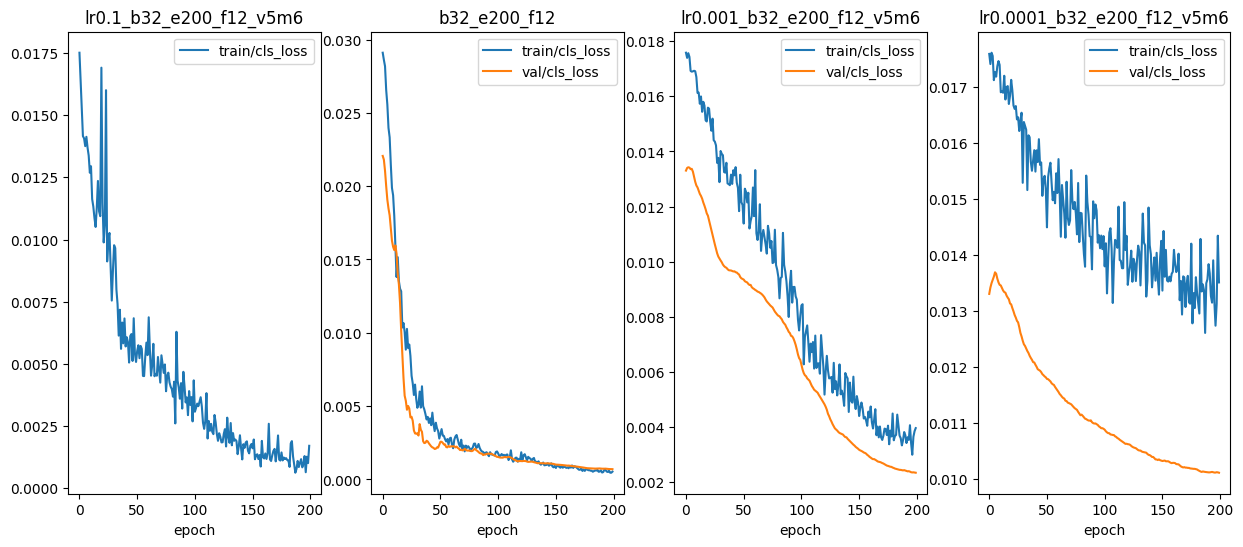

In [45]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
# lr0.1_b32_e150_f12
results_b32_lr1.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32_v5m6.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# lr0.001_b32_e150_f12
results_b32_lr001.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])
# lr0.001_b32_e150_f12
results_b32_lr0001.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[3])


# Set individual title 
axes[0].set_title('lr0.1_b32_e200_f12_v5m6')
axes[1].set_title('b32_e200_f12')
axes[2].set_title('lr0.001_b32_e200_f12_v5m6')
axes[3].set_title('lr0.0001_b32_e200_f12_v5m6')

### The model selected so far is <span style="color:red">b32_e200_f12_v5m6</span> with learning rate 0.01.

## Data aumentation experiments

In [47]:
"""degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.9  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.1  # image mixup (probability)
"""

def hyperparam_tuning(hyperparam_file_path:str, lr_new=0.01, degrees_new=0.0, translate_new=0.1, scale_new=0.9, shear_new=0.0, perspective_new=0.0, 
                      flipud_new=0.0, fliplr_new=0.5, mosaic_new=1.0, mixup_new=0.1):
    
    # Open hyperparamentes file 
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        yaml_dict['degrees'] = degrees_new
        yaml_dict['translate']= translate_new
        yaml_dict['scale']= scale_new
        yaml_dict['shear']= shear_new
        yaml_dict['perspective']= perspective_new
        yaml_dict['flipud']= flipud_new
        yaml_dict['fliplr']= fliplr_new
        yaml_dict['mosaic']= mosaic_new
        yaml_dict['mixup']= mixup_new
        
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)

### Hyper: exploring "degree"

In [48]:
# Set batch size 
batch_s = 32
hyper_path = 'Sverige/hyp.swedish_finetune_med.yaml'
degrees_ls = [45,90,135,180]

for degree in degrees_ls:
    # Give a name to the model
    model_name = f'lr0.01_b32_e200_f12_V5M6_d{degree}'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify hyperparameters
    hyperparam_tuning(hyper_path, degrees_new=degree)
     
    # Train
    !python train.py --batch {batch_s} \
    --epochs 200 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5m6.pt \
    --cache \
    --freeze 12 \
    --project Norway \
    --name {model_name}

**************TRAINING MODEL lr0.01_b32_e200_f12_V5M6_d45*********
train: weights=yolov5m6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/norway/norway_paths.yaml, hyp=Sverige/hyp.swedish_finetune_med.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Norway, name=lr0.01_b32_e200_f12_V5M6_d45, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 28 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyper

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 291.73
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 60.40it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/lr0.01_b32_e200_f12_V5M6_d45/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/lr0.01_b32_e200_f12_V5M6_d45
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1169    0.01856    0.01732        110        640: 1
     

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.107      0.226     0.0762     0.0162

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      4.15G    0.06108    0.01608    0.01355        134        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.427      0.513      0.424     0.0957

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G     0.0593    0.01502    0.01342         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.166      0.414      0.138     0.0331

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      4.15G    0.06054    0.01511    0.01304        122        640: 1
          

     46/199      4.15G    0.04843    0.01083    0.00528        144        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.632      0.773      0.664       0.31

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04701    0.01101   0.005583        140        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.859      0.749      0.794      0.278

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G     0.0442    0.01205   0.004444         94        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.577      0.801      0.594       0.27

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.04076   0.009945   0.003638        167        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.975      0.786       0.89      0.316

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.03941    0.01071   0.004618        128        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.959      0.802      0.882      0.271

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.04139    0.01098   0.003423         88        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.957      0.775      0.845      0.263

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.03653    0.01033   0.002626        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.807      0.865      0.356

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.03616   0.008879   0.002206         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.807      0.875       0.46

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.03639   0.009561   0.003148        102        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.946      0.791      0.853      0.244

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.03324   0.009183   0.002746        190        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.907      0.876      0.889      0.521

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G    0.03349   0.009468   0.003065        135        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.979      0.804      0.891      0.587

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G    0.03318   0.008905   0.002187        187        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.825       0.89      0.556

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.02957   0.008666   0.001402         66        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.955       0.85      0.895      0.507

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.02697   0.008418   0.001912        135        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.969       0.85      0.899      0.567

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.02563    0.00855    0.00189         89        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.962       0.86      0.898      0.563

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.02823   0.006775   0.001364         96        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.976      0.851      0.887       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.02777   0.007401   0.001662         86        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.99      0.836      0.886      0.636

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G     0.0242   0.008045   0.001336         64        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.984      0.836      0.886      0.607

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.02172   0.007287  0.0006802        114        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.858      0.887      0.628

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.02884   0.007729   0.002223        169        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.983      0.853      0.887      0.626

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.02549   0.007935    0.00102        101        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.861      0.886      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
train: Caching images (0.1GB ram): 100%|██████████| 119/119 [00:00<00:00, 298.65
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
val: Caching images (0.0GB ram): 100%|██████████| 32/32 [00:00<00:00, 59.24it/s]

AutoAnchor: 3.97 anchors/target, 0.993 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Norway/lr0.01_b32_e200_f12_V5M6_d90/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Norway/lr0.01_b32_e200_f12_V5M6_d90
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/199       2.8G     0.1167    0.01861    0.01722        110        640: 1
     

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.58      0.451       0.38      0.114

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/199      4.15G     0.0623    0.01707    0.01457        141        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.629      0.496       0.45      0.188

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/199      4.15G    0.06035    0.01507    0.01429         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.547      0.493      0.397      0.144

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/199      4.15G    0.06117    0.01616    0.01386        126        640: 1
          

     46/199      4.15G    0.05144    0.01196   0.006441        143        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.551      0.727      0.548      0.303

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/199      4.15G    0.04848    0.01117   0.006182        141        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.655      0.748      0.679      0.283

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/199      4.15G    0.04739     0.0126   0.005347         91        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.528      0.786      0.561      0.253

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/19

     71/199      4.15G    0.04117   0.009806   0.004198        144        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.89      0.805      0.868      0.554

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/199      4.15G    0.04382    0.01131   0.004366        125        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.879      0.789       0.86      0.526

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/199      4.15G    0.03907    0.01182    0.00334         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.716      0.786      0.806      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/19

     96/199      4.15G    0.03712    0.01025   0.002987        109        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.805      0.867      0.385

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/199      4.15G    0.03622    0.00959   0.002469         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.779      0.865      0.414

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/199      4.15G    0.03655   0.009452    0.00318        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.784      0.866      0.482

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/19

    121/199      4.15G    0.03487   0.009869   0.002053        197        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.925      0.831      0.877      0.488

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/199      4.15G     0.0357    0.01005     0.0022        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.926      0.837       0.87      0.454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/199      4.15G     0.0345   0.009512   0.003017        190        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.928       0.84      0.869      0.452

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/19

    146/199      4.15G    0.03037   0.009497   0.001589         64        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.818      0.894      0.481

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/199      4.15G    0.02945   0.008778   0.001898        129        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.958      0.799       0.89      0.551

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/199      4.15G    0.02747   0.008661   0.001333         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.96      0.799      0.879      0.496

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/19

    171/199      4.15G    0.02876    0.00736   0.001477        100        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.943      0.811      0.879      0.566

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    172/199      4.15G    0.02874   0.008189    0.00141         82        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.939      0.811      0.879      0.625

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    173/199      4.15G    0.02734   0.008784   0.001823         68        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.94      0.811       0.88       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    174/19

    196/199      4.15G    0.02536    0.00802  0.0009181        115        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.938      0.828      0.891      0.577

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    197/199      4.15G    0.02891      0.008    0.00193        172        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.937      0.828      0.888       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    198/199      4.15G    0.02747   0.008597   0.001384        105        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.935      0.828      0.888      0.593

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    199/19

freezing model.6.m.4.cv1.conv.weight
freezing model.6.m.4.cv1.bn.weight
freezing model.6.m.4.cv1.bn.bias
freezing model.6.m.4.cv2.conv.weight
freezing model.6.m.4.cv2.bn.weight
freezing model.6.m.4.cv2.bn.bias
freezing model.6.m.5.cv1.conv.weight
freezing model.6.m.5.cv1.bn.weight
freezing model.6.m.5.cv1.bn.bias
freezing model.6.m.5.cv2.conv.weight
freezing model.6.m.5.cv2.bn.weight
freezing model.6.m.5.cv2.bn.bias
freezing model.7.conv.weight
freezing model.7.bn.weight
freezing model.7.bn.bias
freezing model.8.cv1.conv.weight
freezing model.8.cv1.bn.weight
freezing model.8.cv1.bn.bias
freezing model.8.cv2.conv.weight
freezing model.8.cv2.bn.weight
freezing model.8.cv2.bn.bias
freezing model.8.cv3.conv.weight
freezing model.8.cv3.bn.weight
freezing model.8.cv3.bn.bias
freezing model.8.m.0.cv1.conv.weight
freezing model.8.m.0.cv1.bn.weight
freezing model.8.m.0.cv1.bn.bias
freezing model.8.m.0.cv2.conv.weight
freezing model.8.m.0.cv2.bn.weight
freezing model.8.m.0.cv2.bn.bias
freezing m

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95     0.0549       0.22     0.0296     0.0064

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     15/199      4.15G    0.06726    0.01701    0.01471        107        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.126      0.372      0.108     0.0262

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     16/199      4.15G    0.06398    0.01867    0.01448         85        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.625      0.282      0.346      0.129

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     17/199      4.15G    0.06446    0.01823    0.01429        105        640: 1
          

     39/199      4.15G    0.05007    0.01125   0.008534         87        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.465      0.597      0.484     0.0962

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     40/199      4.15G    0.05168    0.01177   0.007495        158        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.833      0.748      0.757      0.232

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     41/199      4.15G    0.05019    0.01262   0.007627         67        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.483      0.649      0.449      0.189

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     42/19

     64/199      4.15G    0.04428    0.01121   0.004484        112        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.887      0.697      0.795      0.234

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     65/199      4.15G    0.04367    0.01043   0.004056        147        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.754      0.797      0.807      0.303

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     66/199      4.15G    0.04056    0.01144   0.005117        108        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.808      0.743      0.793      0.421

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     67/19

     89/199      4.15G    0.03777    0.01017    0.00252        116        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.931      0.805      0.876      0.514

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     90/199      4.15G    0.04313   0.009629   0.002539        126        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.927      0.826      0.877      0.536

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     91/199      4.15G     0.0381    0.01037   0.003055         78        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.91      0.813      0.873       0.56

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     92/19

    114/199      4.15G    0.03626   0.008931   0.002703        122        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.933      0.833      0.892      0.451

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    115/199      4.15G     0.0351   0.008752   0.002319         94        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.944      0.832      0.891      0.427

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    116/199      4.15G    0.03316    0.01086   0.002031        148        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.899      0.846      0.883      0.518

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    117/19

    139/199      4.15G    0.03386    0.01002   0.002002        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.937       0.83      0.888      0.504

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    140/199      4.15G    0.03224   0.009147   0.001481        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.925      0.833      0.884      0.539

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    141/199      4.15G    0.03044   0.009123   0.001495        173        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.933      0.845       0.89      0.596

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    142/19

    164/199      4.15G     0.0308   0.009534    0.00143        140        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936       0.84       0.89      0.584

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    165/199      4.15G    0.02725   0.007437   0.001074         96        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.968      0.829       0.89      0.588

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    166/199      4.15G    0.03017   0.008276   0.001341        104        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.967      0.827      0.889      0.597

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    167/19

    189/199      4.15G    0.02659   0.008606   0.001531         75        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.951      0.843      0.903       0.59

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    190/199      4.15G    0.02673   0.008224   0.001122        136        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.95      0.841      0.903      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    191/199      4.15G    0.02978   0.007429   0.001031        103        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.963      0.828      0.903      0.571

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    192/19

 26                -1  2   1035264  models.common.C3                        [384, 384, 2, False]          
 27                -1  1   1327872  models.common.Conv                      [384, 384, 3, 2]              
 28          [-1, 16]  1         0  models.common.Concat                    [1]                           
 29                -1  2   2437632  models.common.C3                        [768, 576, 2, False]          
 30                -1  1   2987136  models.common.Conv                      [576, 576, 3, 2]              
 31          [-1, 12]  1         0  models.common.Concat                    [1]                           
 32                -1  2   4429824  models.common.C3                        [1152, 768, 2, False]         
 33  [23, 26, 29, 32]  1     40404  models.yolo.Detect                      [2, [[19, 27, 44, 40, 38, 94], [96, 68, 86, 152, 180, 137], [140, 301, 303, 264, 238, 542], [436, 615, 739, 380, 925, 792]], [192, 384, 576, 768]]
Model summary: 379 layers, 3

      1/199      4.15G     0.1172    0.01945    0.01745        137        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000186     0.0345     0.0001    2.5e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      2/199      4.15G     0.1087    0.01978    0.01716        121        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95          0          0          0          0

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      3/199      4.15G     0.1033    0.02167    0.01628        174        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95   0.000209     0.0248   0.000111   3.96e-05

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      4/19

     26/199      4.15G    0.06171    0.01777    0.01354        134        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.652      0.511      0.511      0.213

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     27/199      4.15G    0.05624    0.01647     0.0133        131        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.198      0.418      0.152       0.03

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     28/199      4.15G    0.05946     0.0143    0.01348        118        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.402      0.624      0.416      0.123

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     29/19

     51/199      4.15G    0.04699    0.01159   0.006902        130        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.534      0.819      0.618      0.206

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     52/199      4.15G    0.04583    0.01076   0.005888        128        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.885       0.73      0.857      0.357

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     53/199      4.15G    0.04606    0.01122   0.006186         80        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.662      0.722      0.735      0.265

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     54/19

     76/199      4.15G    0.04034    0.01023   0.003216         84        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.888      0.774      0.841      0.514

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     77/199      4.15G    0.03935    0.01125   0.003608         91        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.919      0.791      0.856      0.506

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     78/199      4.15G    0.03803    0.01145   0.003787         92        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.92      0.782      0.859      0.548

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     79/19

    101/199      4.15G    0.03583    0.01123   0.002267         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.942       0.82      0.885      0.423

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    102/199      4.15G    0.03844    0.00981   0.002284         90        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.972      0.811       0.89      0.427

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    103/199      4.15G    0.03777    0.00946   0.002277        143        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.944      0.835      0.886      0.565

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    104/19

    126/199      4.15G    0.03481    0.01094   0.002212        139        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.951      0.793      0.881      0.334

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    127/199      4.15G    0.03622    0.01105   0.002235        201        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.961      0.803      0.901      0.562

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    128/199      4.15G    0.03325   0.008477   0.002184        111        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.823      0.897      0.535

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    129/19

    151/199      4.15G     0.0316   0.008929   0.002044         79        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.936      0.841      0.901      0.511

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    152/199      4.15G    0.03299   0.009846   0.001262        109        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.943       0.84        0.9       0.51

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    153/199      4.15G    0.02909   0.009647   0.001627         93        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.845      0.901      0.575

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    154/19

    176/199      4.15G    0.02942   0.007283   0.001795        111        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.947      0.846      0.885       0.57

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    177/199      4.15G    0.02902   0.009871   0.001224        108        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.948      0.841      0.885      0.546

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    178/199      4.15G    0.02854   0.009201   0.001281         59        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         32         95       0.95      0.842      0.887      0.545

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    179/19

                 Class     Images  Instances          P          R      mAP50   
                   all         32         95      0.945      0.837      0.888      0.628
                  n_ab         32         29      0.959      0.811      0.857      0.593
                  n_hr         32         66      0.931      0.864       0.92      0.663
Results saved to Norway/lr0.01_b32_e200_f12_V5M6_d180


In [50]:
# Read results
results_d45_csv_path = f'Norway/lr0.01_b32_e200_f12_V5M6_d45/results.csv'
results_d45 = rename_df_cols(pd.read_csv(results_d45_csv_path))

results_d90_csv_path = f'Norway/lr0.01_b32_e200_f12_V5M6_d90/results.csv'
results_d90 = rename_df_cols(pd.read_csv(results_d90_csv_path))

results_d135_csv_path = f'Norway/lr0.01_b32_e200_f12_V5M6_d135/results.csv'
results_d135 = rename_df_cols(pd.read_csv(results_d135_csv_path))

results_d180_csv_path = f'Norway/lr0.01_b32_e200_f12_V5M6_d180/results.csv'
results_d180 = rename_df_cols(pd.read_csv(results_d180_csv_path))

Text(0.5, 1.0, 'lr0.01_b32_e150_f12_V5M6_d180')

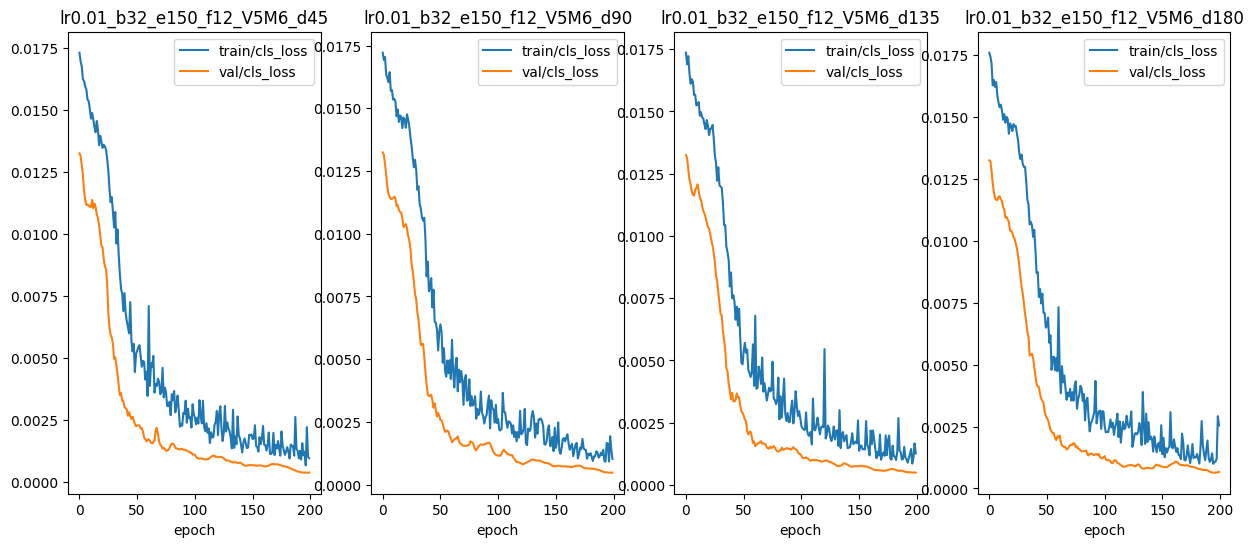

In [51]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
results_d45.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
results_d90.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
results_d135.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])
results_d180.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[3])

# Set individual title 
axes[0].set_title('lr0.01_b32_e150_f12_V5M6_d45')
axes[1].set_title('lr0.01_b32_e150_f12_V5M6_d90')
axes[2].set_title('lr0.01_b32_e150_f12_V5M6_d135')
axes[3].set_title('lr0.01_b32_e150_f12_V5M6_d180')

Text(0.5, 1.0, 'lr0.01_b32_e150_f12_V5M6_d180')

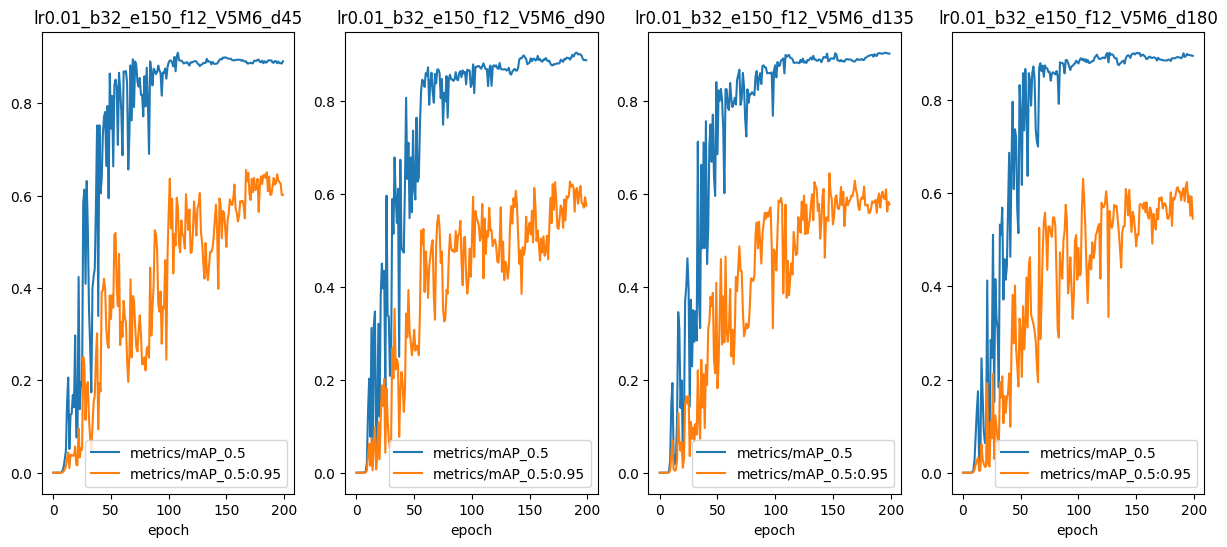

In [53]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
results_d45.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[0]) 
results_d90.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[1])
results_d135.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[2])
results_d180.plot(x='epoch', y=['metrics/mAP_0.5', 'metrics/mAP_0.5:0.95'], ax=axes[3])

# Set individual title 
axes[0].set_title('lr0.01_b32_e150_f12_V5M6_d45')
axes[1].set_title('lr0.01_b32_e150_f12_V5M6_d90')
axes[2].set_title('lr0.01_b32_e150_f12_V5M6_d135')
axes[3].set_title('lr0.01_b32_e150_f12_V5M6_d180')